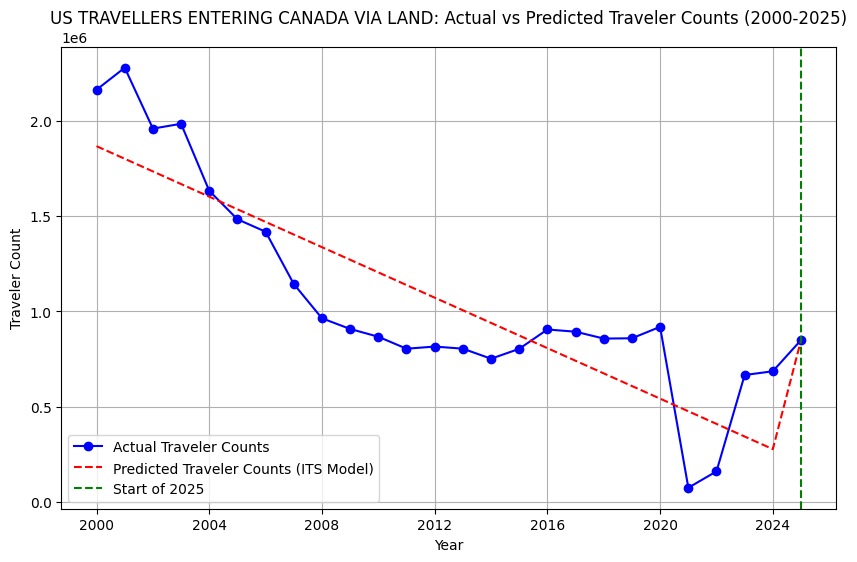

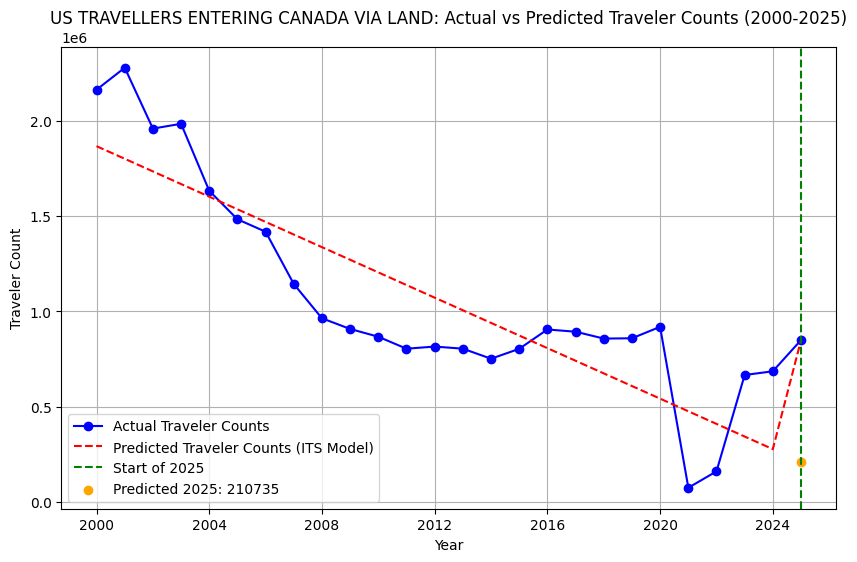

Predicted number of travelers for 2025: 210735
                            OLS Regression Results                            
Dep. Variable:              Travelers   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     33.95
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           1.37e-07
Time:                        22:08:53   Log-Likelihood:                -362.40
No. Observations:                  26   AIC:                             730.8
Df Residuals:                      23   BIC:                             734.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
c

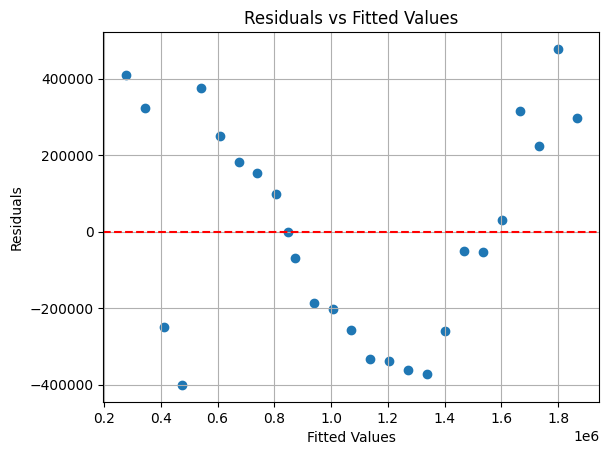

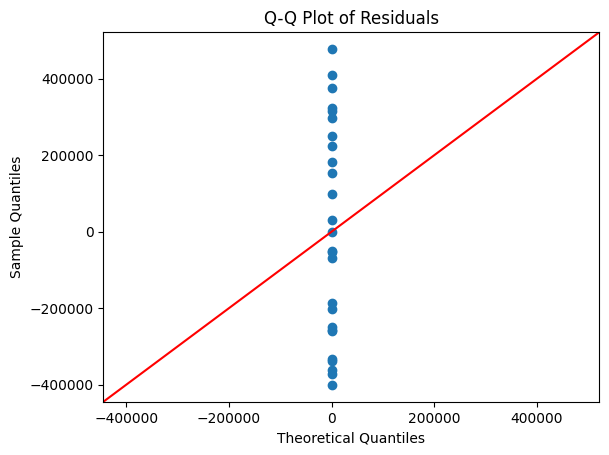

Levene’s test statistic: 0.12117977042401247, p-value: 0.7292198252154509
Durbin-Watson Statistic: 0.7472816905607359


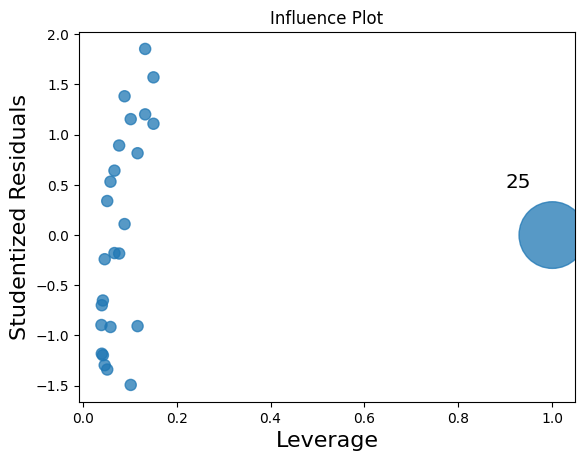

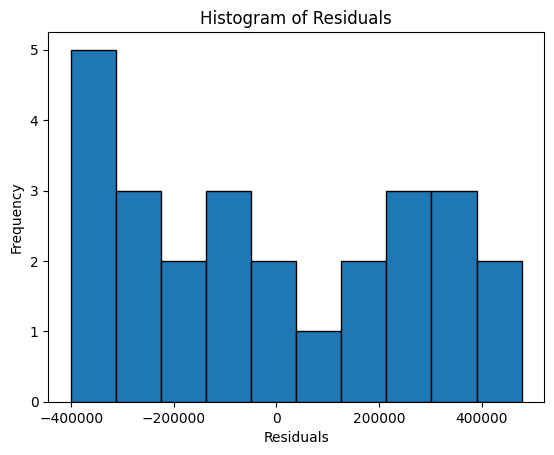

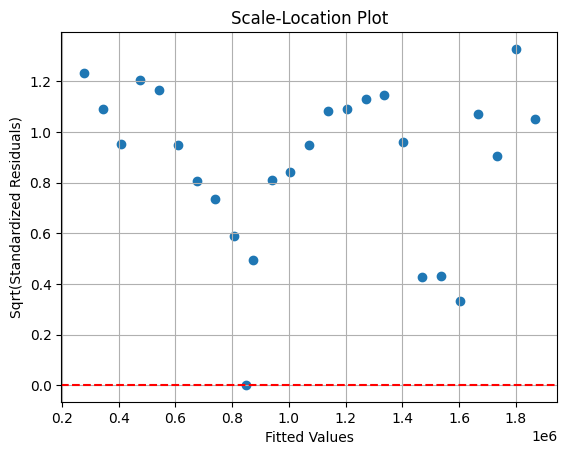

In [ ]:
# US TRAVELLERS ENTERING CANADA VIA LAND: Actual vs Predicted Traveler Counts (2000-2025)
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

 #Data for travelers from 2000-2025
data = {
   'Date': [
        '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
        '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
        '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01',
        '2024-01-01', '2025-01-01'
    ],
    'Travelers': [
        2161951, 2277514, 1958254, 1983565, 1632375, 1482636, 1417424, 1143393, 963554, 907468, 866690, 803987, 815191,
        804093, 751461, 803338, 904807, 893109, 857092, 858662, 918575, 74962, 160707, 666019, 685639, 849495
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Add time variables
df['time'] = np.arange(1, len(df) + 1)  # Sequential time (1, 2, 3, ..., 26)
df['intervention'] = np.where(df['Date'].dt.year >= 2025, 1, 0)  # Binary intervention variable for 2025
df['post_time'] = np.where(df['Date'].dt.year >= 2025, df['time'] - 2024, 0)  # Time since 2025

# OLS Regression: Y = β0 + β1 * time + β2 * intervention + β3 * post_time + ε
X = df[['time', 'intervention', 'post_time']]
X = sm.add_constant(X)  # Add intercept
y = df['Travelers']

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Predict the values for the full dataset (including 2025)
df['predicted'] = results.predict(X)

# Plot the actual vs predicted data for 2025
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Travelers'], label='Actual Traveler Counts', color='b', marker='o')
plt.plot(df['Date'], df['predicted'], label='Predicted Traveler Counts (ITS Model)', color='r', linestyle='--')

# Highlight the start of 2025
plt.axvline(pd.to_datetime('2025-01-01'), color='g', linestyle='--', label='Start of 2025')

plt.title('US TRAVELLERS ENTERING CANADA VIA LAND: Actual vs Predicted Traveler Counts (2000-2025)')
plt.xlabel('Year')
plt.ylabel('Traveler Count')
plt.legend()
plt.grid(True)
plt.show()

# Create a new DataFrame to predict the value for 2025
new_data = pd.DataFrame({
    'const': [1],
    'time': [26],  # This is the time point for 2025
    'intervention': [1],  # For post-2025 period
    'post_time': [1]  # Time since 2025 (relative to the intervention)
})

# Predict for 2025 using the model
predicted_2025 = results.predict(new_data)[0]

# Add 2025 prediction to the plot
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Travelers'], label='Actual Traveler Counts', color='b', marker='o')
plt.plot(df['Date'], df['predicted'], label='Predicted Traveler Counts (ITS Model)', color='r', linestyle='--')

# Highlight the start of 2025 and the predicted value for 2025
plt.axvline(pd.to_datetime('2025-01-01'), color='g', linestyle='--', label='Start of 2025')
plt.scatter(pd.to_datetime('2025-01-01'), predicted_2025, color='orange', label=f'Predicted 2025: {predicted_2025:.0f}')

plt.title('US TRAVELLERS ENTERING CANADA VIA LAND: Actual vs Predicted Traveler Counts (2000-2025)')
plt.xlabel('Year')
plt.ylabel('Traveler Count')
plt.legend()
plt.grid(True)
plt.show()

# Print the predicted value for 2025
print(f"Predicted number of travelers for 2025: {predicted_2025:.0f}")

# Print the regression results summary
print(results.summary())

# Diagnostic Checks
# 1. Residuals vs Fitted Plot
plt.scatter(df['predicted'], results.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# 2. Q-Q Plot for Normality of Residuals
sm.qqplot(results.resid, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Levene's Test for Homogeneity of Variance
stat, p_value = stats.levene(df['Travelers'], df['predicted'])
print(f"Levene’s test statistic: {stat}, p-value: {p_value}")

# 4. Durbin-Watson Test for Autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(results.resid)
print(f'Durbin-Watson Statistic: {dw_stat}')

# 5. Influence Plot
sm.graphics.influence_plot(results)
plt.title('Influence Plot')
plt.show()

# 6. Histogram of Residuals
plt.hist(results.resid, bins=10, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 7. Scale-Location Plot
standardized_residuals = results.get_influence().resid_studentized_internal
plt.scatter(df['predicted'], np.sqrt(np.abs(standardized_residuals)))
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Scale-Location Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(Standardized Residuals)')
plt.grid(True)
plt.show()

IGNORE

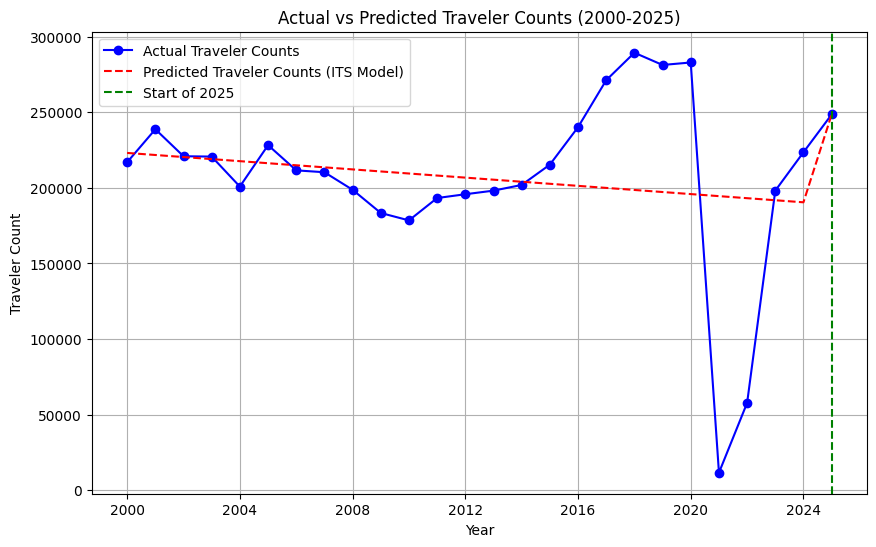

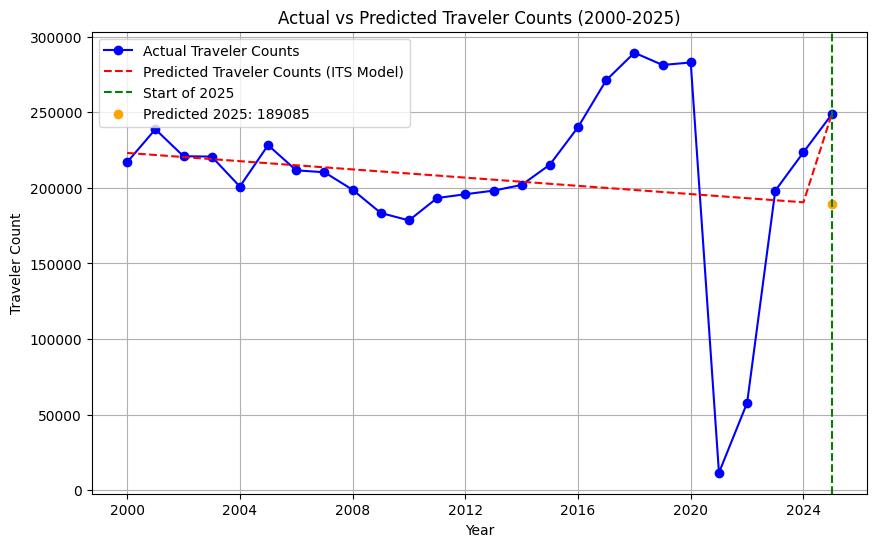

Predicted number of travelers for 2025: 189085
                            OLS Regression Results                            
Dep. Variable:              Travelers   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.5487
Date:                Thu, 03 Apr 2025   Prob (F-statistic):              0.585
Time:                        20:51:28   Log-Likelihood:                -321.81
No. Observations:                  26   AIC:                             649.6
Df Residuals:                      23   BIC:                             653.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
c

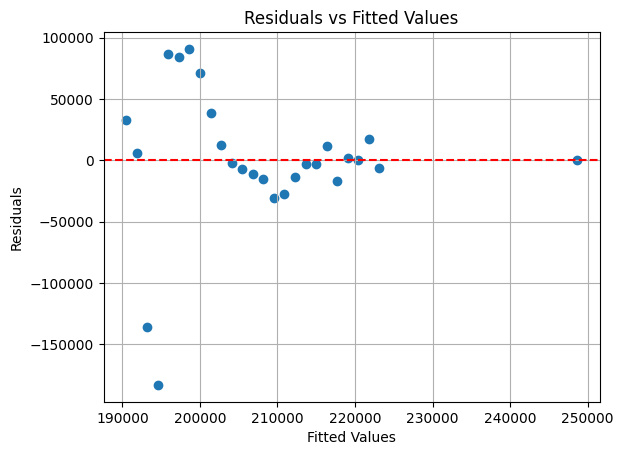

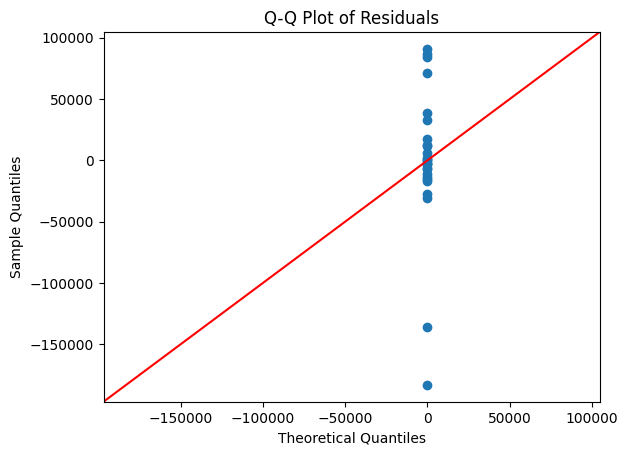

Levene’s test statistic: 7.728544103645891, p-value: 0.007640766965305543
Durbin-Watson Statistic: 1.194461447536978


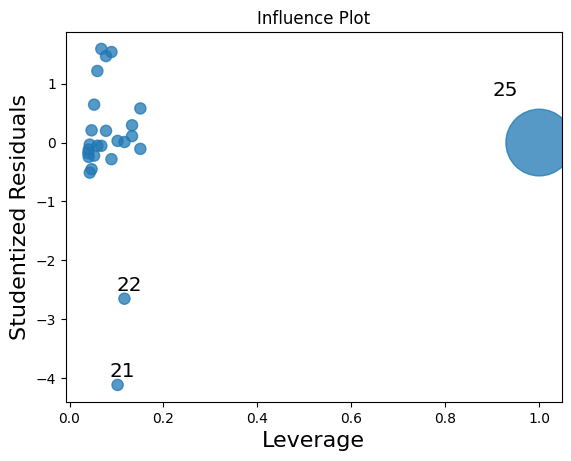

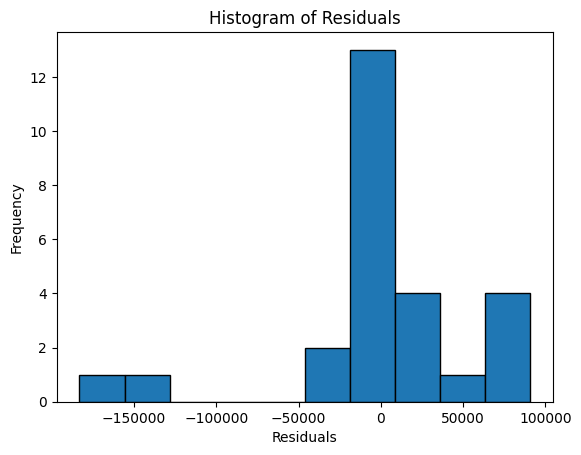

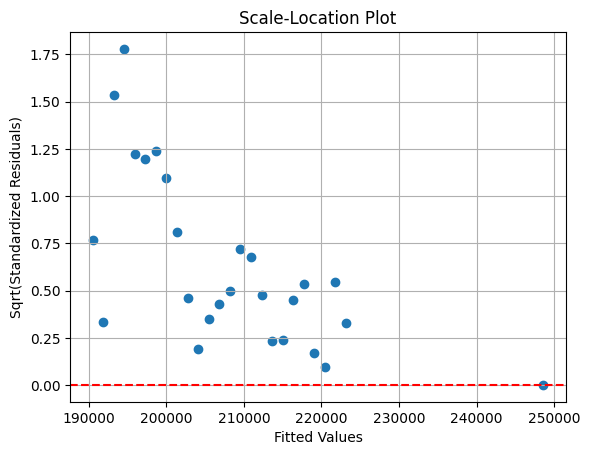

In [ ]:
#US TRAVELLERS ENTERING CANADA VIA AIR: Actual vs Predicted Traveler Counts (2000-2025)
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#Data for travelers from 2000-2025
data = {
   'Date': [
        "2000-01-01", "2001-01-01", "2002-01-01", "2003-01-01", "2004-01-01", "2005-01-01", "2006-01-01", "2007-01-01",
        "2008-01-01", "2009-01-01", "2010-01-01", "2011-01-01", "2012-01-01", "2013-01-01", "2014-01-01", "2015-01-01",
        "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01", "2021-01-01", "2022-01-01", "2023-01-01",
        "2024-01-01", "2025-01-01"
    ],
    'Travelers': [
        216987, 238824, 220961, 220739, 200893, 228299, 211623, 210382, 198782, 183404,
        178505, 193304, 195813, 198202, 201965, 215393, 240179, 271319, 289486, 281378,
        283023, 11487, 57701, 198179, 223574, 248628
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Add time variables
df['time'] = np.arange(1, len(df) + 1)  # Sequential time (1, 2, 3, ..., 26)
df['intervention'] = np.where(df['Date'].dt.year >= 2025, 1, 0)  # Binary intervention variable for 2025
df['post_time'] = np.where(df['Date'].dt.year >= 2025, df['time'] - 2024, 0)  # Time since 2025

# OLS Regression: Y = β0 + β1 * time + β2 * intervention + β3 * post_time + ε
X = df[['time', 'intervention', 'post_time']]
X = sm.add_constant(X)  # Add intercept
y = df['Travelers']

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Predict the values for the full dataset (including 2025)
df['predicted'] = results.predict(X)

# Plot the actual vs predicted data for 2025
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Travelers'], label='Actual Traveler Counts', color='b', marker='o')
plt.plot(df['Date'], df['predicted'], label='Predicted Traveler Counts (ITS Model)', color='r', linestyle='--')

# Highlight the start of 2025
plt.axvline(pd.to_datetime('2025-01-01'), color='g', linestyle='--', label='Start of 2025')

plt.title('Actual vs Predicted Traveler Counts (2000-2025)')
plt.xlabel('Year')
plt.ylabel('Traveler Count')
plt.legend()
plt.grid(True)
plt.show()

# Create a new DataFrame to predict the value for 2025
new_data = pd.DataFrame({
    'const': [1],
    'time': [26],  # This is the time point for 2025
    'intervention': [1],  # For post-2025 period
    'post_time': [1]  # Time since 2025 (relative to the intervention)
})

# Predict for 2025 using the model
predicted_2025 = results.predict(new_data)[0]

# Add 2025 prediction to the plot
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Travelers'], label='Actual Traveler Counts', color='b', marker='o')
plt.plot(df['Date'], df['predicted'], label='Predicted Traveler Counts (ITS Model)', color='r', linestyle='--')

# Highlight the start of 2025 and the predicted value for 2025
plt.axvline(pd.to_datetime('2025-01-01'), color='g', linestyle='--', label='Start of 2025')
plt.scatter(pd.to_datetime('2025-01-01'), predicted_2025, color='orange', label=f'Predicted 2025: {predicted_2025:.0f}')

plt.title('Actual vs Predicted Traveler Counts (2000-2025)')
plt.xlabel('Year')
plt.ylabel('Traveler Count')
plt.legend()
plt.grid(True)
plt.show()

# Print the predicted value for 2025
print(f"Predicted number of travelers for 2025: {predicted_2025:.0f}")

# Print the regression results summary
print(results.summary())

# Diagnostic Checks
# 1. Residuals vs Fitted Plot
plt.scatter(df['predicted'], results.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# 2. Q-Q Plot for Normality of Residuals
sm.qqplot(results.resid, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Levene's Test for Homogeneity of Variance
stat, p_value = stats.levene(df['Travelers'], df['predicted'])
print(f"Levene’s test statistic: {stat}, p-value: {p_value}")

# 4. Durbin-Watson Test for Autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(results.resid)
print(f'Durbin-Watson Statistic: {dw_stat}')

# 5. Influence Plot
sm.graphics.influence_plot(results)
plt.title('Influence Plot')
plt.show()

# 6. Histogram of Residuals
plt.hist(results.resid, bins=10, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 7. Scale-Location Plot
standardized_residuals = results.get_influence().resid_studentized_internal
plt.scatter(df['predicted'], np.sqrt(np.abs(standardized_residuals)))
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Scale-Location Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(Standardized Residuals)')
plt.grid(True)
plt.show()

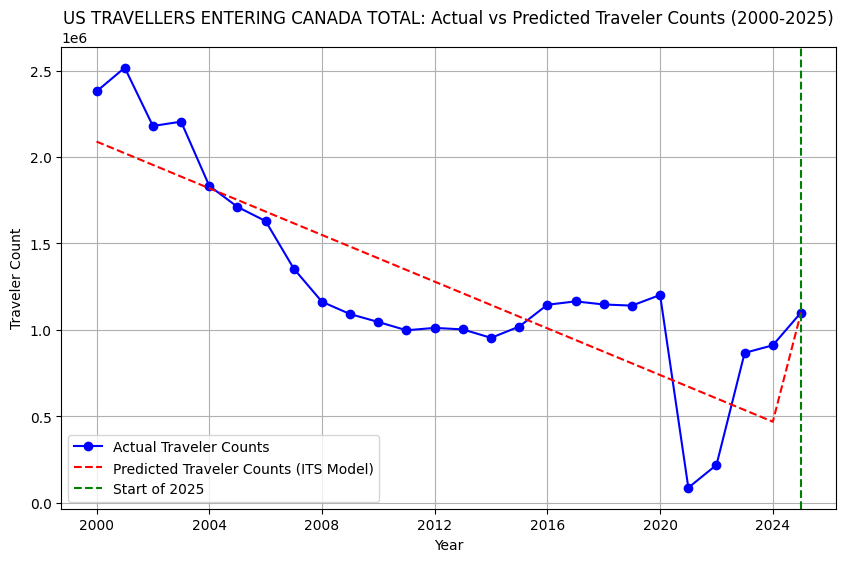

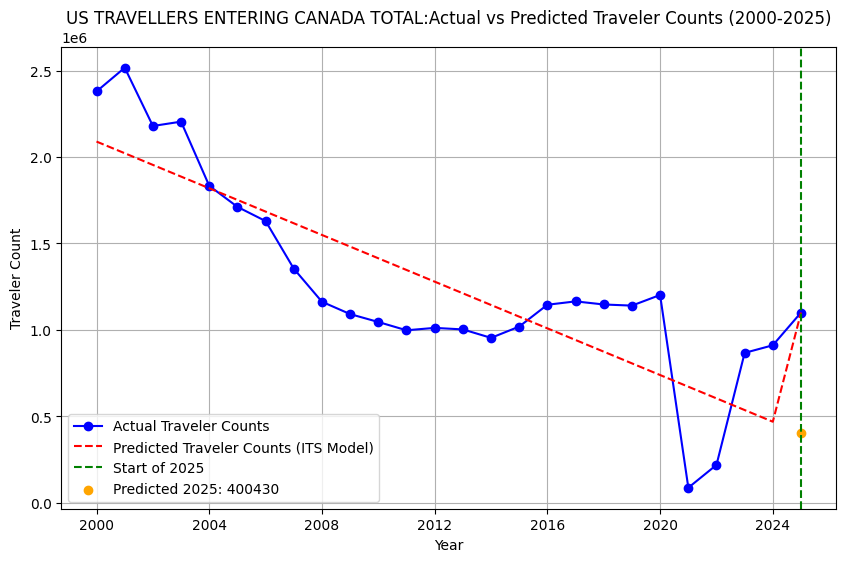

Predicted number of travelers for 2025: 400430
                            OLS Regression Results                            
Dep. Variable:              Travelers   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     27.07
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           9.05e-07
Time:                        22:14:41   Log-Likelihood:                -365.82
No. Observations:                  26   AIC:                             737.6
Df Residuals:                      23   BIC:                             741.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
c

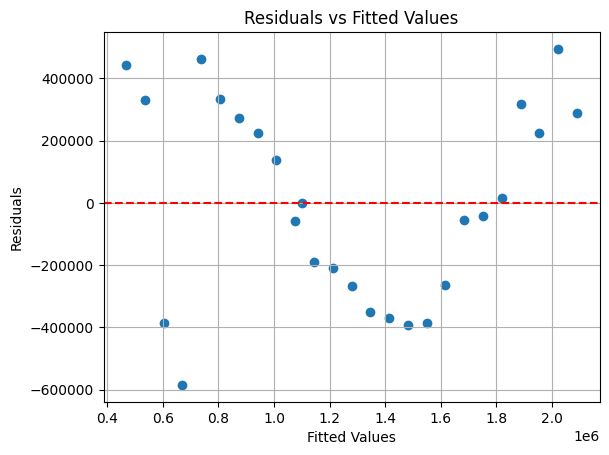

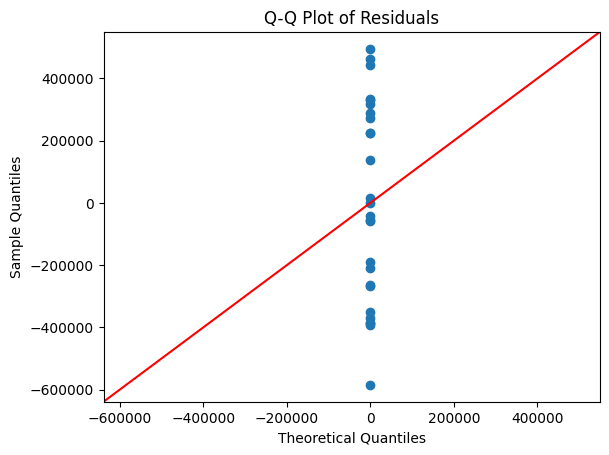

Levene’s test statistic: 0.04139597679531951, p-value: 0.8396012874810985
Durbin-Watson Statistic: 0.8810954396471874


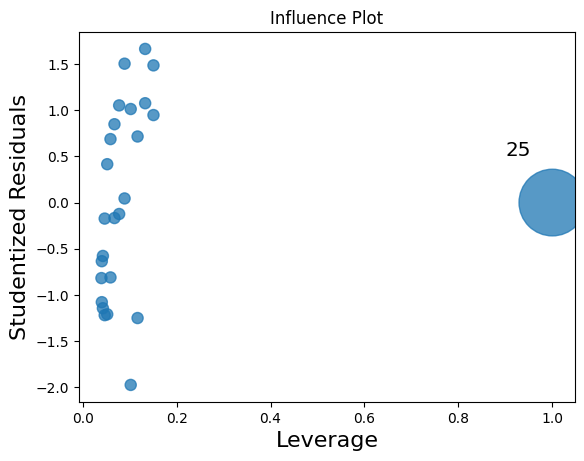

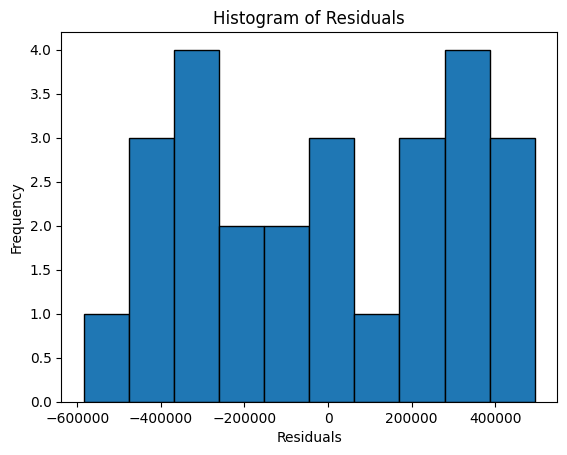

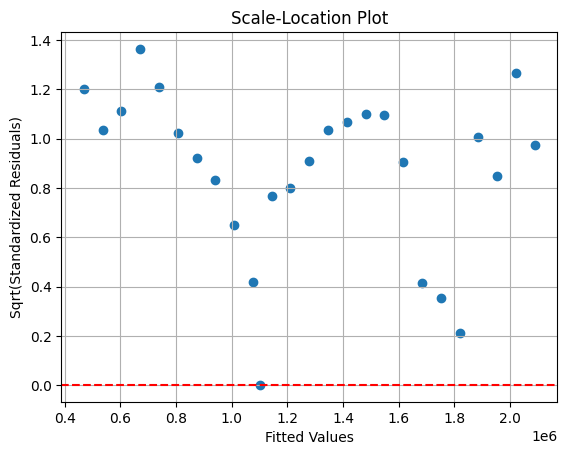

In [22]:
#US TRAVELLERS ENTERING CANADA OVERALL: Actual vs Predicted Traveler Counts (2000-2025)# JANUARY ONLY 2001 TO JANUARY 2025
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#Data for travelers from 2000-2025
data = {
   'Date': [
        "2000-01-01", "2001-01-01", "2002-01-01", "2003-01-01", "2004-01-01", "2005-01-01", "2006-01-01", "2007-01-01",
        "2008-01-01", "2009-01-01", "2010-01-01", "2011-01-01", "2012-01-01", "2013-01-01", "2014-01-01", "2015-01-01",
        "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01", "2021-01-01", "2022-01-01", "2023-01-01",
        "2024-01-01", "2025-01-01"
    ],
    'Travelers': [
        2379373, 2516617, 2179481, 2204612, 1833581, 1711345, 1629252, 1353963, 1162479, 1090995,
        1045322, 997427, 1011258, 1002423, 953524, 1018877, 1145168, 1164610, 1146690, 1140166,
        1201690, 86456, 218558, 866679, 910621, 1100257
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Add time variables
df['time'] = np.arange(1, len(df) + 1)  # Sequential time (1, 2, 3, ..., 26)
df['intervention'] = np.where(df['Date'].dt.year >= 2025, 1, 0)  # Binary intervention variable for 2025
df['post_time'] = np.where(df['Date'].dt.year >= 2025, df['time'] - 2024, 0)  # Time since 2025

# OLS Regression: Y = β0 + β1 * time + β2 * intervention + β3 * post_time + ε
X = df[['time', 'intervention', 'post_time']]
X = sm.add_constant(X)  # Add intercept
y = df['Travelers']

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Predict the values for the full dataset (including 2025)
df['predicted'] = results.predict(X)

# Plot the actual vs predicted data for 2025
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Travelers'], label='Actual Traveler Counts', color='b', marker='o')
plt.plot(df['Date'], df['predicted'], label='Predicted Traveler Counts (ITS Model)', color='r', linestyle='--')

# Highlight the start of 2025
plt.axvline(pd.to_datetime('2025-01-01'), color='g', linestyle='--', label='Start of 2025')

plt.title('US TRAVELLERS ENTERING CANADA TOTAL: Actual vs Predicted Traveler Counts (2000-2025)')
plt.xlabel('Year')
plt.ylabel('Traveler Count')
plt.legend()
plt.grid(True)
plt.show()

# Create a new DataFrame to predict the value for 2025
new_data = pd.DataFrame({
    'const': [1],
    'time': [26],  # This is the time point for 2025
    'intervention': [1],  # For post-2025 period
    'post_time': [1]  # Time since 2025 (relative to the intervention)
})

# Predict for 2025 using the model
predicted_2025 = results.predict(new_data)[0]

# Add 2025 prediction to the plot
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Travelers'], label='Actual Traveler Counts', color='b', marker='o')
plt.plot(df['Date'], df['predicted'], label='Predicted Traveler Counts (ITS Model)', color='r', linestyle='--')

# Highlight the start of 2025 and the predicted value for 2025
plt.axvline(pd.to_datetime('2025-01-01'), color='g', linestyle='--', label='Start of 2025')
plt.scatter(pd.to_datetime('2025-01-01'), predicted_2025, color='orange', label=f'Predicted 2025: {predicted_2025:.0f}')

plt.title('US TRAVELLERS ENTERING CANADA TOTAL:Actual vs Predicted Traveler Counts (2000-2025)')
plt.xlabel('Year')
plt.ylabel('Traveler Count')
plt.legend()
plt.grid(True)
plt.show()

# Print the predicted value for 2025
print(f"Predicted number of travelers for 2025: {predicted_2025:.0f}")

# Print the regression results summary
print(results.summary())

# Diagnostic Checks
# 1. Residuals vs Fitted Plot
plt.scatter(df['predicted'], results.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# 2. Q-Q Plot for Normality of Residuals
sm.qqplot(results.resid, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Levene's Test for Homogeneity of Variance
stat, p_value = stats.levene(df['Travelers'], df['predicted'])
print(f"Levene’s test statistic: {stat}, p-value: {p_value}")

# 4. Durbin-Watson Test for Autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(results.resid)
print(f'Durbin-Watson Statistic: {dw_stat}')

# 5. Influence Plot
sm.graphics.influence_plot(results)
plt.title('Influence Plot')
plt.show()

# 6. Histogram of Residuals
plt.hist(results.resid, bins=10, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 7. Scale-Location Plot
standardized_residuals = results.get_influence().resid_studentized_internal
plt.scatter(df['predicted'], np.sqrt(np.abs(standardized_residuals)))
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Scale-Location Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(Standardized Residuals)')
plt.grid(True)
plt.show()

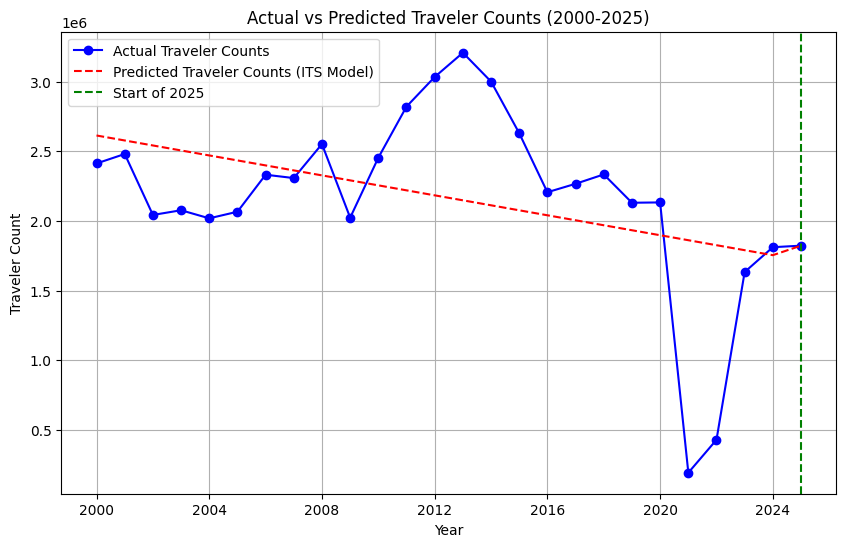

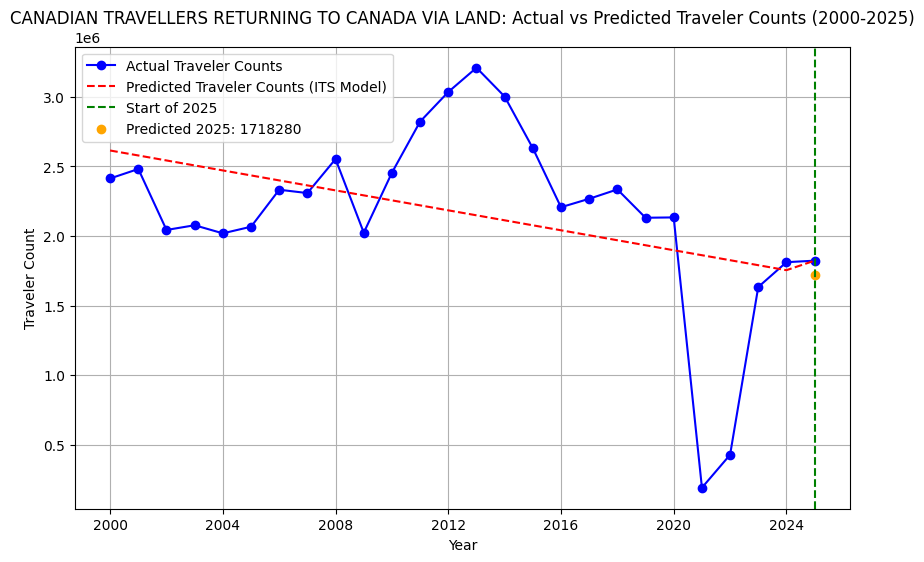

Predicted number of travelers for 2025: 1718280
                            OLS Regression Results                            
Dep. Variable:              Travelers   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     2.196
Date:                Thu, 03 Apr 2025   Prob (F-statistic):              0.134
Time:                        22:16:16   Log-Likelihood:                -382.85
No. Observations:                  26   AIC:                             771.7
Df Residuals:                      23   BIC:                             775.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------


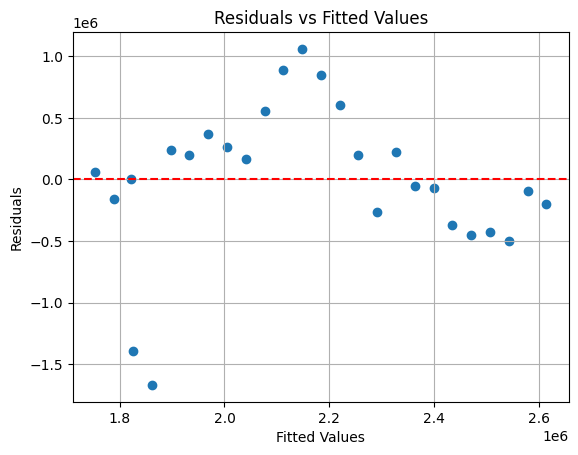

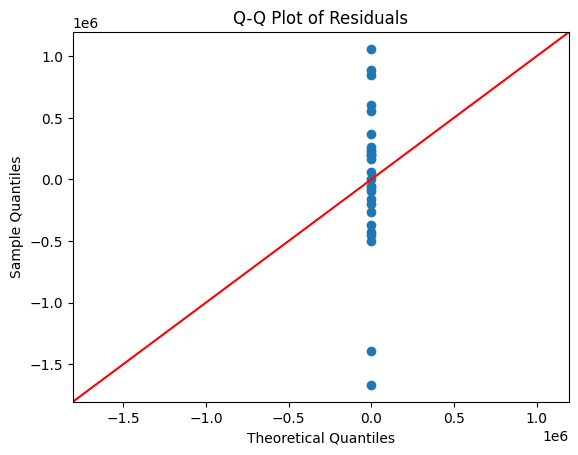

Levene’s test statistic: 3.9375419854555322, p-value: 0.05272177988676044
Durbin-Watson Statistic: 0.7154701748845756


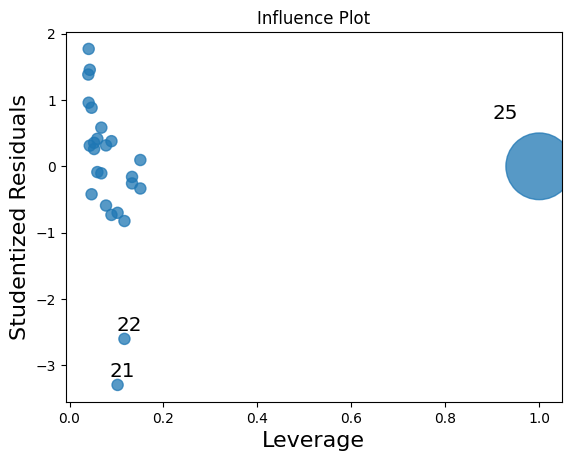

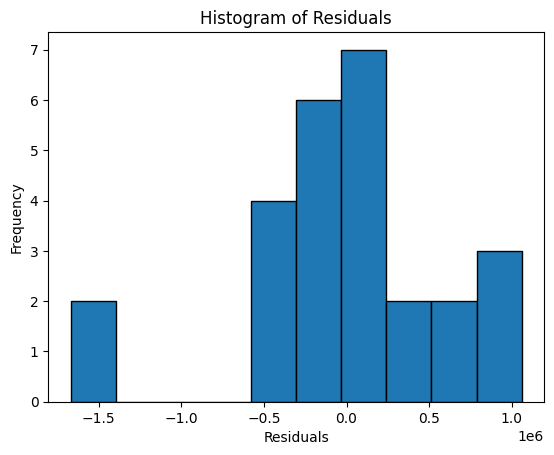

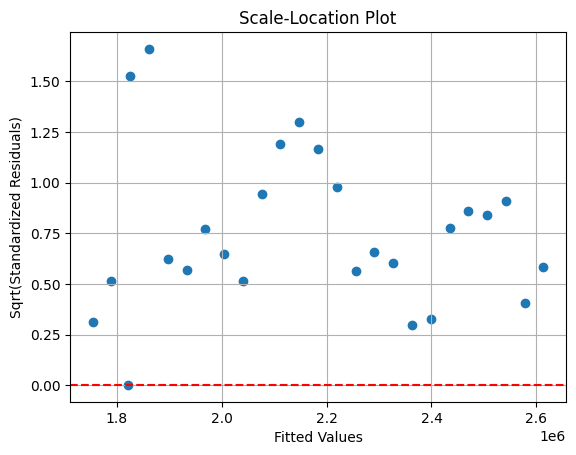

In [23]:
#CANADIAN TRAVELLERS RETURNIGN TO CANADA VIA LAND: Actual vs Predicted Traveler Counts (2000-2025)
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#Data for travelers from 2000-2025
data = {
   'Date': [
        "2000-01-01", "2001-01-01", "2002-01-01", "2003-01-01", "2004-01-01", "2005-01-01", "2006-01-01", "2007-01-01",
        "2008-01-01", "2009-01-01", "2010-01-01", "2011-01-01", "2012-01-01", "2013-01-01", "2014-01-01", "2015-01-01",
        "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01", "2021-01-01", "2022-01-01", "2023-01-01",
        "2024-01-01", "2025-01-01"
    ],
    'Travelers': [
        2412575, 2480518, 2042884, 2076722, 2018639, 2066091, 2331740, 2307662, 2551879, 2023341,
        2454010, 2820717, 3033350, 3207616, 3000522, 2630092, 2206077, 2266722, 2333912, 2130547,
        2132891, 192318, 428880, 1633224, 1811362, 1822502
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Add time variables
df['time'] = np.arange(1, len(df) + 1)  # Sequential time (1, 2, 3, ..., 26)
df['intervention'] = np.where(df['Date'].dt.year >= 2025, 1, 0)  # Binary intervention variable for 2025
df['post_time'] = np.where(df['Date'].dt.year >= 2025, df['time'] - 2024, 0)  # Time since 2025

# OLS Regression: Y = β0 + β1 * time + β2 * intervention + β3 * post_time + ε
X = df[['time', 'intervention', 'post_time']]
X = sm.add_constant(X)  # Add intercept
y = df['Travelers']

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Predict the values for the full dataset (including 2025)
df['predicted'] = results.predict(X)

# Plot the actual vs predicted data for 2025
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Travelers'], label='Actual Traveler Counts', color='b', marker='o')
plt.plot(df['Date'], df['predicted'], label='Predicted Traveler Counts (ITS Model)', color='r', linestyle='--')

# Highlight the start of 2025
plt.axvline(pd.to_datetime('2025-01-01'), color='g', linestyle='--', label='Start of 2025')

plt.title('Actual vs Predicted Traveler Counts (2000-2025)')
plt.xlabel('Year')
plt.ylabel('Traveler Count')
plt.legend()
plt.grid(True)
plt.show()

# Create a new DataFrame to predict the value for 2025
new_data = pd.DataFrame({
    'const': [1],
    'time': [26],  # This is the time point for 2025
    'intervention': [1],  # For post-2025 period
    'post_time': [1]  # Time since 2025 (relative to the intervention)
})

# Predict for 2025 using the model
predicted_2025 = results.predict(new_data)[0]

# Add 2025 prediction to the plot
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Travelers'], label='Actual Traveler Counts', color='b', marker='o')
plt.plot(df['Date'], df['predicted'], label='Predicted Traveler Counts (ITS Model)', color='r', linestyle='--')

# Highlight the start of 2025 and the predicted value for 2025
plt.axvline(pd.to_datetime('2025-01-01'), color='g', linestyle='--', label='Start of 2025')
plt.scatter(pd.to_datetime('2025-01-01'), predicted_2025, color='orange', label=f'Predicted 2025: {predicted_2025:.0f}')

plt.title('CANADIAN TRAVELLERS RETURNING TO CANADA VIA LAND: Actual vs Predicted Traveler Counts (2000-2025)')
plt.xlabel('Year')
plt.ylabel('Traveler Count')
plt.legend()
plt.grid(True)
plt.show()

# Print the predicted value for 2025
print(f"Predicted number of travelers for 2025: {predicted_2025:.0f}")

# Print the regression results summary
print(results.summary())

# Diagnostic Checks
# 1. Residuals vs Fitted Plot
plt.scatter(df['predicted'], results.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# 2. Q-Q Plot for Normality of Residuals
sm.qqplot(results.resid, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Levene's Test for Homogeneity of Variance
stat, p_value = stats.levene(df['Travelers'], df['predicted'])
print(f"Levene’s test statistic: {stat}, p-value: {p_value}")

# 4. Durbin-Watson Test for Autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(results.resid)
print(f'Durbin-Watson Statistic: {dw_stat}')

# 5. Influence Plot
sm.graphics.influence_plot(results)
plt.title('Influence Plot')
plt.show()

# 6. Histogram of Residuals
plt.hist(results.resid, bins=10, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 7. Scale-Location Plot
standardized_residuals = results.get_influence().resid_studentized_internal
plt.scatter(df['predicted'], np.sqrt(np.abs(standardized_residuals)))
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Scale-Location Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(Standardized Residuals)')
plt.grid(True)
plt.show()

CANADIAN RESIDENT TESTS

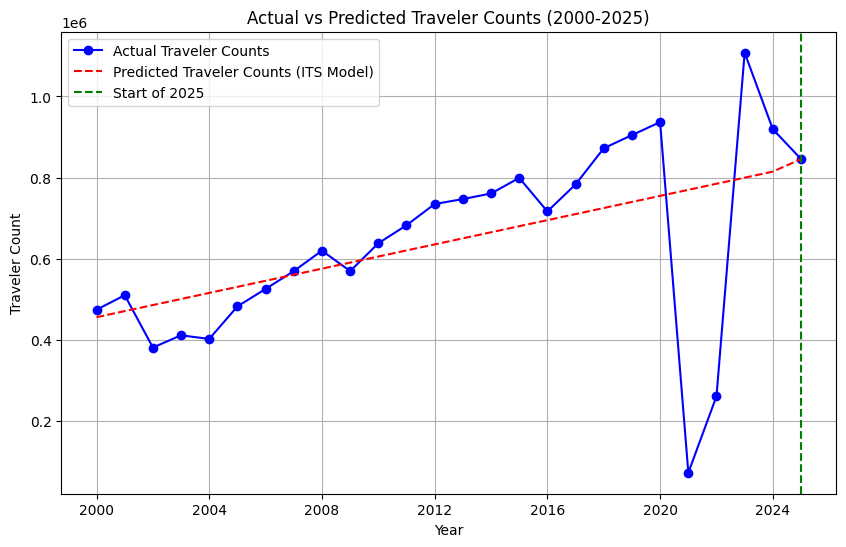

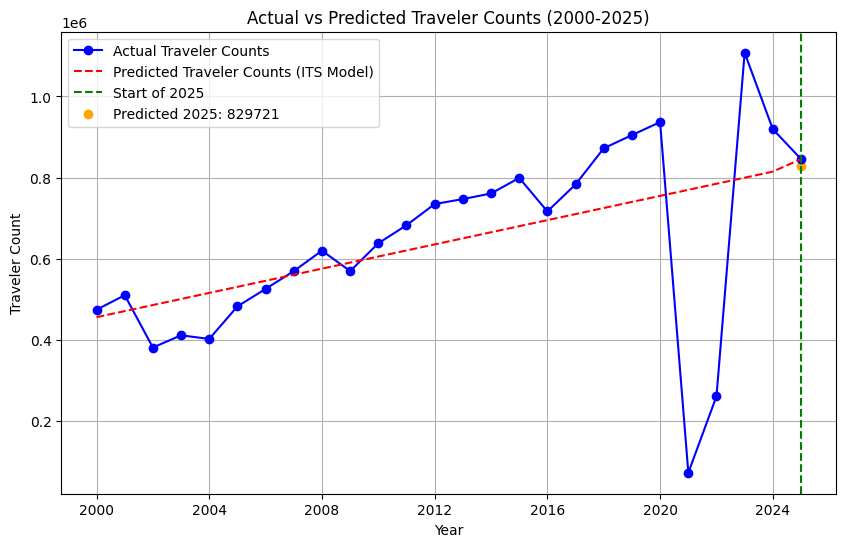

Predicted number of travelers for 2025: 829721
                            OLS Regression Results                            
Dep. Variable:              Travelers   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     3.680
Date:                Thu, 03 Apr 2025   Prob (F-statistic):             0.0411
Time:                        20:59:38   Log-Likelihood:                -354.26
No. Observations:                  26   AIC:                             714.5
Df Residuals:                      23   BIC:                             718.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
c

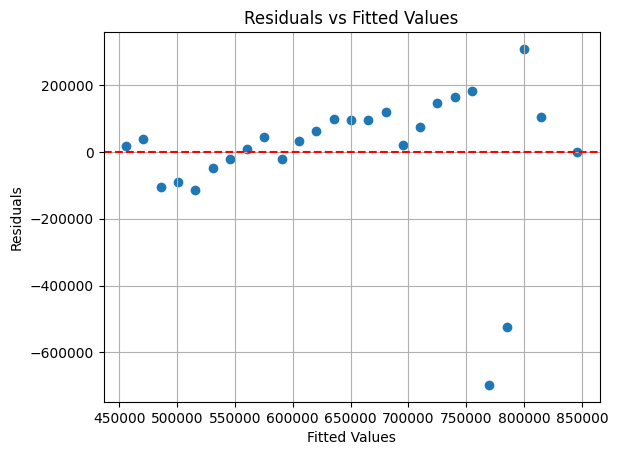

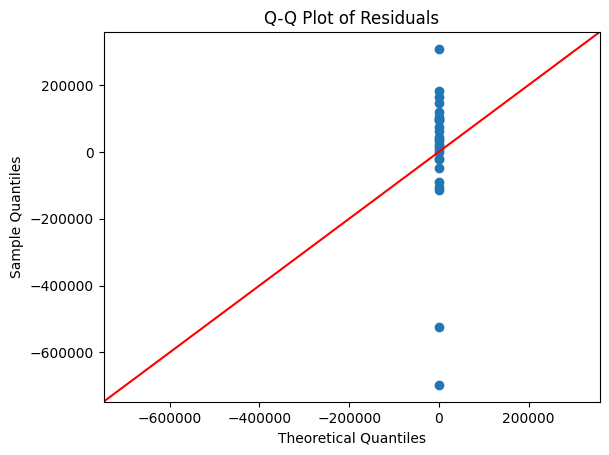

Levene’s test statistic: 9.757778691842296, p-value: 0.0029689481483421154
Durbin-Watson Statistic: 1.5420346852938687


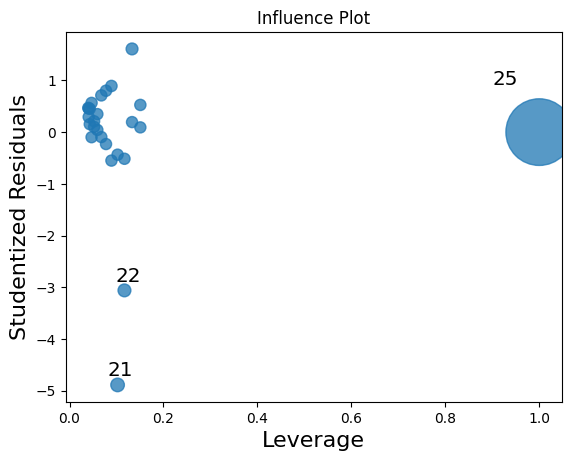

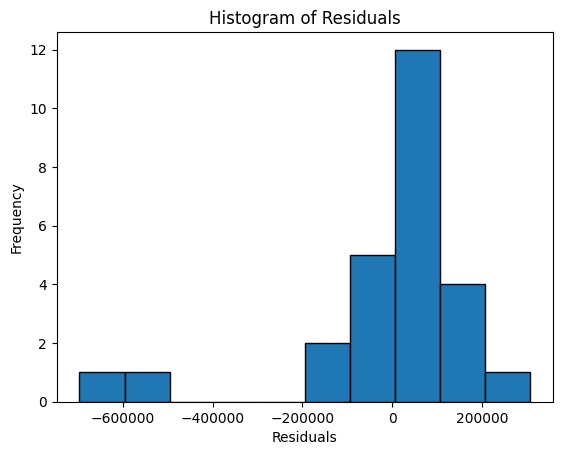

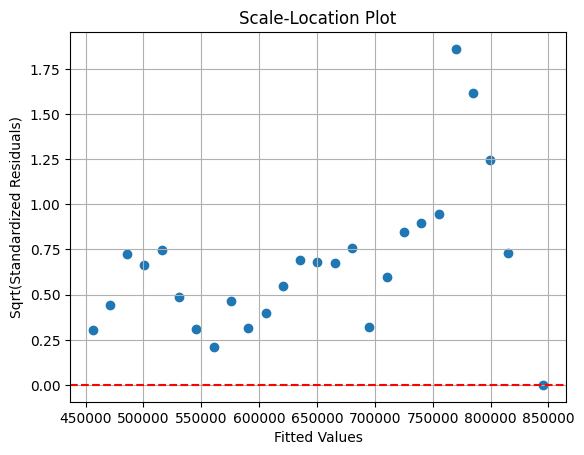

In [ ]:
#CANADIAN TRAVELLERS RETURNING TO CANADA VIA AIR: Actual vs Predicted Traveler Counts (2000-2025)
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#Data for travelers from 2000-2025
data = {
   'Date': [
        "2000-01-01", "2001-01-01", "2002-01-01", "2003-01-01", "2004-01-01", "2005-01-01", "2006-01-01", "2007-01-01",
        "2008-01-01", "2009-01-01", "2010-01-01", "2011-01-01", "2012-01-01", "2013-01-01", "2014-01-01", "2015-01-01",
        "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01", "2021-01-01", "2022-01-01", "2023-01-01",
        "2024-01-01", "2025-01-01"
    ],
    'Travelers': [
        474372, 510152, 381235, 411363, 402378, 482633, 525694, 569567, 619980, 569630,
        638197, 682657, 734872, 747132, 760867, 799317, 716712, 783361, 872392, 904756,
        936866, 72649, 261143, 1107843, 919454, 845669
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Add time variables
df['time'] = np.arange(1, len(df) + 1)  # Sequential time (1, 2, 3, ..., 26)
df['intervention'] = np.where(df['Date'].dt.year >= 2025, 1, 0)  # Binary intervention variable for 2025
df['post_time'] = np.where(df['Date'].dt.year >= 2025, df['time'] - 2024, 0)  # Time since 2025

# OLS Regression: Y = β0 + β1 * time + β2 * intervention + β3 * post_time + ε
X = df[['time', 'intervention', 'post_time']]
X = sm.add_constant(X)  # Add intercept
y = df['Travelers']

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Predict the values for the full dataset (including 2025)
df['predicted'] = results.predict(X)

# Plot the actual vs predicted data for 2025
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Travelers'], label='Actual Traveler Counts', color='b', marker='o')
plt.plot(df['Date'], df['predicted'], label='Predicted Traveler Counts (ITS Model)', color='r', linestyle='--')

# Highlight the start of 2025
plt.axvline(pd.to_datetime('2025-01-01'), color='g', linestyle='--', label='Start of 2025')

plt.title('Actual vs Predicted Traveler Counts (2000-2025)')
plt.xlabel('Year')
plt.ylabel('Traveler Count')
plt.legend()
plt.grid(True)
plt.show()

# Create a new DataFrame to predict the value for 2025
new_data = pd.DataFrame({
    'const': [1],
    'time': [26],  # This is the time point for 2025
    'intervention': [1],  # For post-2025 period
    'post_time': [1]  # Time since 2025 (relative to the intervention)
})

# Predict for 2025 using the model
predicted_2025 = results.predict(new_data)[0]

# Add 2025 prediction to the plot
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Travelers'], label='Actual Traveler Counts', color='b', marker='o')
plt.plot(df['Date'], df['predicted'], label='Predicted Traveler Counts (ITS Model)', color='r', linestyle='--')

# Highlight the start of 2025 and the predicted value for 2025
plt.axvline(pd.to_datetime('2025-01-01'), color='g', linestyle='--', label='Start of 2025')
plt.scatter(pd.to_datetime('2025-01-01'), predicted_2025, color='orange', label=f'Predicted 2025: {predicted_2025:.0f}')

plt.title('Actual vs Predicted Traveler Counts (2000-2025)')
plt.xlabel('Year')
plt.ylabel('Traveler Count')
plt.legend()
plt.grid(True)
plt.show()

# Print the predicted value for 2025
print(f"Predicted number of travelers for 2025: {predicted_2025:.0f}")

# Print the regression results summary
print(results.summary())

# Diagnostic Checks
# 1. Residuals vs Fitted Plot
plt.scatter(df['predicted'], results.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# 2. Q-Q Plot for Normality of Residuals
sm.qqplot(results.resid, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Levene's Test for Homogeneity of Variance
stat, p_value = stats.levene(df['Travelers'], df['predicted'])
print(f"Levene’s test statistic: {stat}, p-value: {p_value}")

# 4. Durbin-Watson Test for Autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(results.resid)
print(f'Durbin-Watson Statistic: {dw_stat}')

# 5. Influence Plot
sm.graphics.influence_plot(results)
plt.title('Influence Plot')
plt.show()

# 6. Histogram of Residuals
plt.hist(results.resid, bins=10, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 7. Scale-Location Plot
standardized_residuals = results.get_influence().resid_studentized_internal
plt.scatter(df['predicted'], np.sqrt(np.abs(standardized_residuals)))
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Scale-Location Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(Standardized Residuals)')
plt.grid(True)
plt.show()

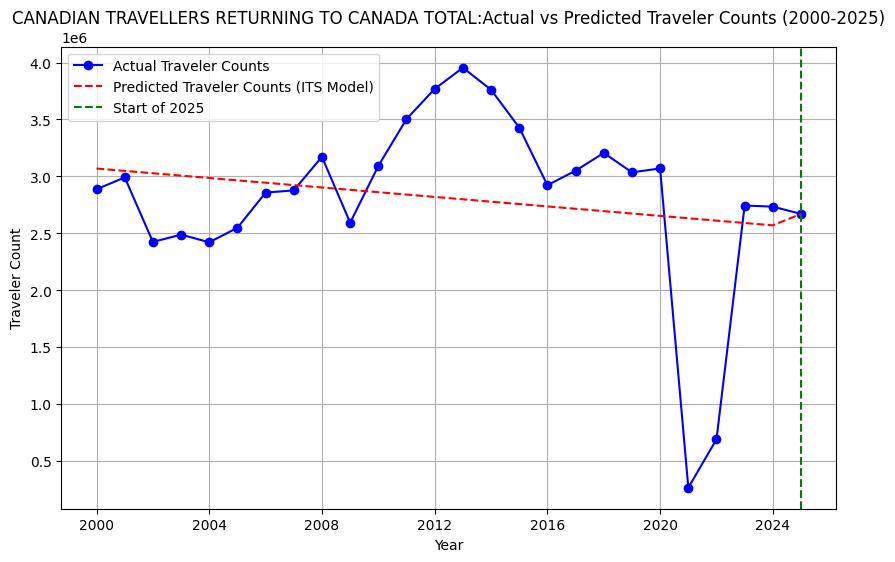

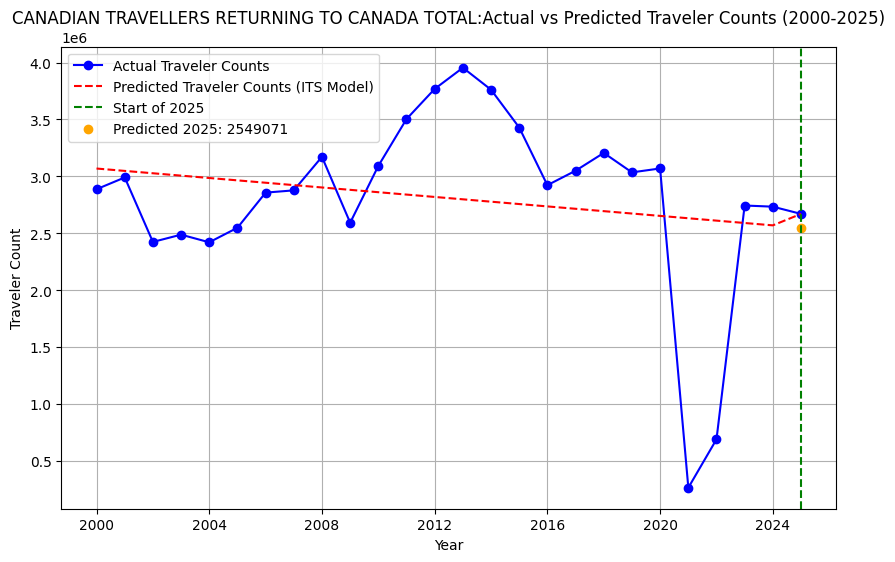

Predicted number of travelers for 2025: 2549071
                            OLS Regression Results                            
Dep. Variable:              Travelers   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                    0.4323
Date:                Thu, 03 Apr 2025   Prob (F-statistic):              0.654
Time:                        22:18:02   Log-Likelihood:                -389.40
No. Observations:                  26   AIC:                             784.8
Df Residuals:                      23   BIC:                             788.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------


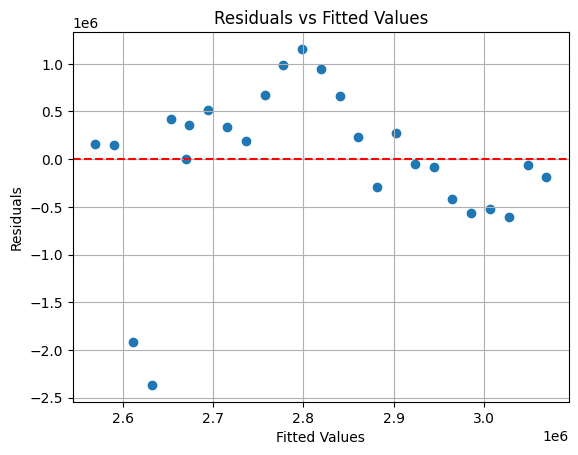

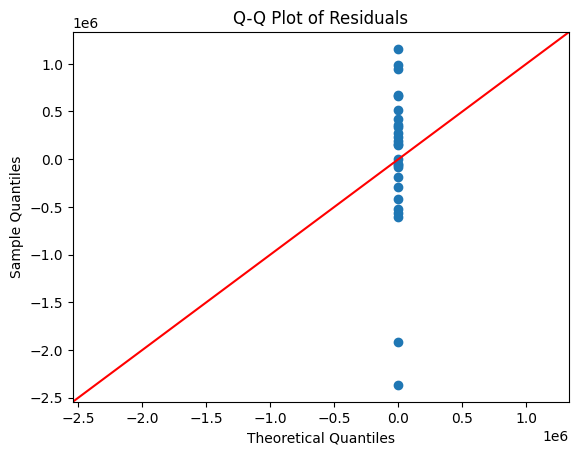

Levene’s test statistic: 8.244865868812544, p-value: 0.005978782864239799
Durbin-Watson Statistic: 0.912152018817065


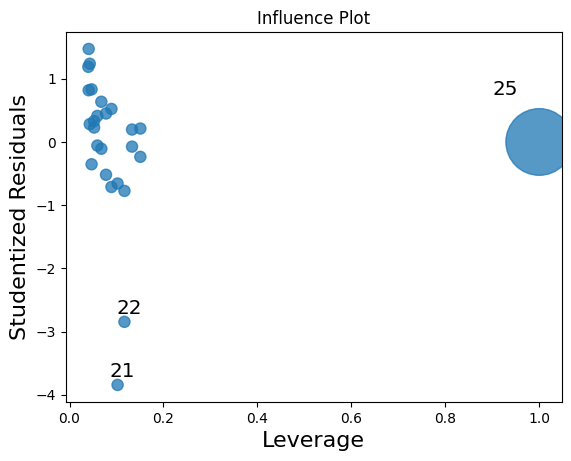

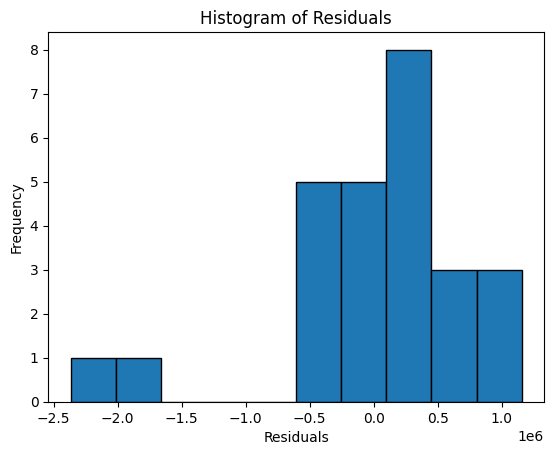

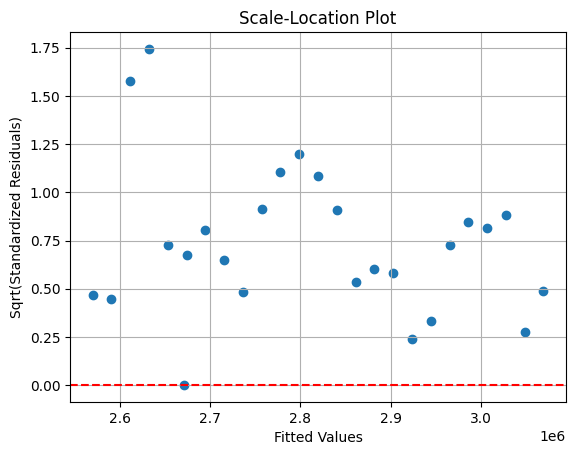

In [24]:
#CANADIAN TRAVELLERS RETURNIGN TO CANADA OVERALL: Actual vs Predicted Traveler Counts (2000-2025)
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#Data for travelers from 2000-2025
data = {
   'Date': [
        "2000-01-01", "2001-01-01", "2002-01-01", "2003-01-01", "2004-01-01", "2005-01-01", "2006-01-01", "2007-01-01",
        "2008-01-01", "2009-01-01", "2010-01-01", "2011-01-01", "2012-01-01", "2013-01-01", "2014-01-01", "2015-01-01",
        "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01", "2021-01-01", "2022-01-01", "2023-01-01",
        "2024-01-01", "2025-01-01"
    ],
    'Travelers': [
        2887227, 2990873, 2424297, 2488296, 2421217, 2548897, 2857631, 2877375, 3172026, 2593090,
        3092336, 3503674, 3768389, 3954853, 3761567, 3429575, 2922914, 3050181, 3206391, 3035434,
        3069835, 264999, 690166, 2744340, 2734155, 2670643
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Add time variables
df['time'] = np.arange(1, len(df) + 1)  # Sequential time (1, 2, 3, ..., 26)
df['intervention'] = np.where(df['Date'].dt.year >= 2025, 1, 0)  # Binary intervention variable for 2025
df['post_time'] = np.where(df['Date'].dt.year >= 2025, df['time'] - 2024, 0)  # Time since 2025

# OLS Regression: Y = β0 + β1 * time + β2 * intervention + β3 * post_time + ε
X = df[['time', 'intervention', 'post_time']]
X = sm.add_constant(X)  # Add intercept
y = df['Travelers']

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Predict the values for the full dataset (including 2025)
df['predicted'] = results.predict(X)

# Plot the actual vs predicted data for 2025
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Travelers'], label='Actual Traveler Counts', color='b', marker='o')
plt.plot(df['Date'], df['predicted'], label='Predicted Traveler Counts (ITS Model)', color='r', linestyle='--')

# Highlight the start of 2025
plt.axvline(pd.to_datetime('2025-01-01'), color='g', linestyle='--', label='Start of 2025')

plt.title('CANADIAN TRAVELLERS RETURNING TO CANADA TOTAL:Actual vs Predicted Traveler Counts (2000-2025)')
plt.xlabel('Year')
plt.ylabel('Traveler Count')
plt.legend()
plt.grid(True)
plt.show()

# Create a new DataFrame to predict the value for 2025
new_data = pd.DataFrame({
    'const': [1],
    'time': [26],  # This is the time point for 2025
    'intervention': [1],  # For post-2025 period
    'post_time': [1]  # Time since 2025 (relative to the intervention)
})

# Predict for 2025 using the model
predicted_2025 = results.predict(new_data)[0]

# Add 2025 prediction to the plot
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Travelers'], label='Actual Traveler Counts', color='b', marker='o')
plt.plot(df['Date'], df['predicted'], label='Predicted Traveler Counts (ITS Model)', color='r', linestyle='--')

# Highlight the start of 2025 and the predicted value for 2025
plt.axvline(pd.to_datetime('2025-01-01'), color='g', linestyle='--', label='Start of 2025')
plt.scatter(pd.to_datetime('2025-01-01'), predicted_2025, color='orange', label=f'Predicted 2025: {predicted_2025:.0f}')

plt.title('CANADIAN TRAVELLERS RETURNING TO CANADA TOTAL:Actual vs Predicted Traveler Counts (2000-2025)')
plt.xlabel('Year')
plt.ylabel('Traveler Count')
plt.legend()
plt.grid(True)
plt.show()

# Print the predicted value for 2025
print(f"Predicted number of travelers for 2025: {predicted_2025:.0f}")

# Print the regression results summary
print(results.summary())

# Diagnostic Checks
# 1. Residuals vs Fitted Plot
plt.scatter(df['predicted'], results.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# 2. Q-Q Plot for Normality of Residuals
sm.qqplot(results.resid, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Levene's Test for Homogeneity of Variance
stat, p_value = stats.levene(df['Travelers'], df['predicted'])
print(f"Levene’s test statistic: {stat}, p-value: {p_value}")

# 4. Durbin-Watson Test for Autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(results.resid)
print(f'Durbin-Watson Statistic: {dw_stat}')

# 5. Influence Plot
sm.graphics.influence_plot(results)
plt.title('Influence Plot')
plt.show()

# 6. Histogram of Residuals
plt.hist(results.resid, bins=10, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 7. Scale-Location Plot
standardized_residuals = results.get_influence().resid_studentized_internal
plt.scatter(df['predicted'], np.sqrt(np.abs(standardized_residuals)))
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Scale-Location Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(Standardized Residuals)')
plt.grid(True)
plt.show()